### Use TargetModel class


In [6]:
%load_ext autoreload
%autoreload 2  # reload all the imports when a cell is run
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from cas9_model.target_model import TargetModel, generate_mismatches, load_parameters
import seaborn as sns
sns.set_style('ticks')
sns.set()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


ModuleNotFoundError: No module named 'cas9_model.gillespie.cyGillespie'

In [2]:
parameters = load_parameters('boyle')
DNA = TargetModel('Full Target', parameters, mismatches=[], concentration=10)

Print average dwelltime

In [3]:
print(f'Average dwelltime: {DNA.master_equation.average_offtime:.2f} s')

Average dwelltime: 188622.27 s


### Plot distribution in linear and log scale 
 by solving the master equation

In [4]:
dist, times = DNA.master_equation.offtime_dist(logbins=True, tmax=1e+8, t_resolution=1)

<Figure size 432x288 with 0 Axes>

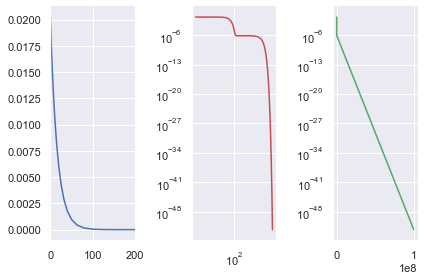

In [5]:

sns.despine()
plt.rcParams['axes.grid'] = True
plt.rcParams['axes.grid.which'] = 'both'
fig, axes = plt.subplots(1,3, sharey=False);
axes[0].plot(times, dist); axes[0].set_xlim((0, 200)); 
axes[1].loglog(times, dist, 'r') ; #axes[1].set_ylim(bottom=0, top=0.03); axes[1].set_xlim((0, 10000000))
axes[2].semilogy(times, dist, 'g'); #axes[2].set_ylim(bottom=0, top=0.03); #axes[2].set_xlim((0, 1000)); 
fig.tight_layout()
sns.despine()

### Microscopic Energy landscape

(<matplotlib.lines.Line2D at 0x1c2bc06b708>, <Figure size 432x288 with 1 Axes>)

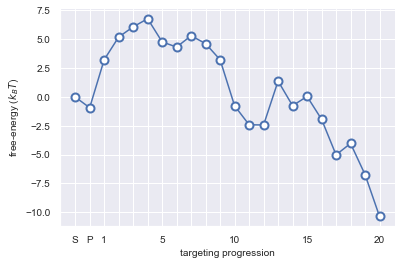

In [6]:
DNA.landscape.plot()

In [7]:
g = DNA.gillespie
# transition_times, states, dwells, ontimes = g.find_events()

In [52]:
times, states, off_times, on_times = g.find_events(Tmin=300)

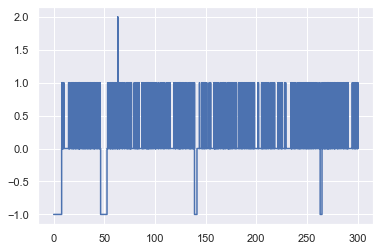

In [53]:
%matplotlib inline
plt.step(times, states, where='post')

In [49]:
on_times


array([ 9.02894191, 23.89393211,  5.10898941,  4.26494543,  6.46470754,
       35.16629888])

### Plot landscape from gillespie traces

For now we will plot 100 landscapes generated by 10, 100, and 1000 dwelltimes up to length 13

In [2]:
%matplotlib qt
params = load_parameters('boyle')
DNA = TargetModel('Full Target', params)
lFT, fig = DNA.landscape.plot()

landscapes10 = np.load('./landscape_simulations/landscapes_L20N100R10.npz')['landscape']
_ = fig.axes[0].plot(range(-1, landscapes10.shape[1]-1), landscapes10.T, 'y', alpha=0.5, lw=1, zorder=-1)

# average10 = np.average(landscapes10, axis=0)
# std10 = np.std(landscapes10, axis=0)
# _ = fig.axes[0].errorbar(range(-1, landscapes10.shape[1]-1), average10, yerr=std10, c='y', alpha=1, lw=2)

# landscapes100 = np.loadtxt('./landscape_simulations/landscapes_L20N100R10_cy.dat')
# _ = fig.axes[0].plot(range(-1, landscapes100.shape[1]-1), landscapes100.T, 'g', alpha=0.5, lw=1)

# average100 = np.average(landscapes100, axis=0)
# std100 = np.std(landscapes100, axis=0)
# _ = fig.axes[0].errorbar(range(-1, landscapes100.shape[1]-1), average100, yerr=std100, c='g', alpha=1, lw=2)

# landscapes1000 = np.loadtxt('./landscape_simulations/landscapes_L17N1000R10.dat')
# _ = fig.axes[0].plot(range(-1, landscapes1000.shape[1]-1), landscapes1000.T, 'r', alpha=0.5, lw=1)

# average1000 = np.average(landscapes1000, axis=0)
# std1000 = np.std(landscapes1000, axis=0)
# _ = fig.axes[0].errorbar(range(-1, landscapes1000.shape[1]-1), average1000, yerr=std1000, c='r', alpha=1, lw=2)

NameError: name 'load_parameters' is not defined

In [41]:
landscapes1000.shape

(10, 19)

In [4]:
np.diff(np.array([1,2,3]))


array([1, 1])

In [40]:
a = np.array([1,2,1,4,5])
d = np.diff(a)
w = np.where(np.diff(a) < 0)[0]


In [42]:
d[w]



array([-1])

In [39]:
a[w]

array([], dtype=int32)